In [6]:
# Jhose Immanuel Sembiring
# 1103202047
# TK44G4
# LeNet_MNIST
# Dokumentasi ChatGPT : https://chatgpt.com/share/9e152618-511e-4878-b3b9-fb2e71c8973e

#Library

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


#Memuat Dataset MNIST

In [8]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

#Normalisasi gambar

In [9]:
# Normalisasi gambar ke rentang [0,1] dan merubah bentuk array menjadi (28, 28, 1)
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

#Fungsi Pembuatan Model LeNet

In [10]:
# Definisi fungsi untuk membuat model LeNet
def build_lenet():
    model = models.Sequential()
    # C1 - Convolutional Layer: 6 filter, ukuran filter 5x5, fungsi aktivasi tanh
    model.add(layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(28, 28, 1)))
    # S2 - Subsampling Layer (Pooling): average pooling dengan ukuran 2x2, stride 2
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=2))
    # C3 - Convolutional Layer: 16 filter, ukuran filter 5x5, fungsi aktivasi tanh
    model.add(layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'))
    # S4 - Subsampling Layer (Pooling): average pooling dengan ukuran 2x2, stride 2
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=2))
    # C5 - Fully Connected Convolutional Layer: 120 filter, ukuran filter 5x5, fungsi aktivasi tanh, padding 'same'
    model.add(layers.Conv2D(120, kernel_size=(5, 5), activation='tanh', padding='same'))
    # Meratakan output sebelum masuk ke lapisan fully connected
    model.add(layers.Flatten())
    # F6 - Fully Connected Layer: 84 neuron, fungsi aktivasi tanh
    model.add(layers.Dense(84, activation='tanh'))
    # Output Layer: 10 neuron (untuk 10 kelas di dataset MNIST), fungsi aktivasi softmax
    model.add(layers.Dense(10, activation='softmax'))
    return model


#Pembuatan Model

In [11]:
# Membuat model LeNet
model = build_lenet()
# Menampilkan ringkasan arsitektur model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_4 (Avera  (None, 12, 12, 6)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_5 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 1920)             

#Kompilasi Model

In [12]:
# Kompilasi model dengan optimizer Adam, fungsi kehilangan sparse_categorical_crossentropy, dan metrik akurasi
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Melatih dan Evaluasi Model

In [13]:
# Melatih model dengan data latih, menggunakan 10 epoch dan ukuran batch 32
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

# Evaluasi model dengan data uji
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
1875/1875 [==============================] - 13s 5ms/step - loss: 0.2572 - accuracy: 0.9230 - val_loss: 0.1379 - val_accuracy: 0.9582
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1284 - accuracy: 0.9616 - val_loss: 0.0955 - val_accuracy: 0.9721
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0997 - accuracy: 0.9696 - val_loss: 0.0826 - val_accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0842 - accuracy: 0.9741 - val_loss: 0.0841 - val_accuracy: 0.9735
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0736 - accuracy: 0.9771 - val_loss: 0.0763 - val_accuracy: 0.9759
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0693 - accuracy: 0.9787 - val_loss: 0.0626 - val_accuracy: 0.9790
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0655 - accuracy: 0.9797 - val_loss: 0.0676 - val_accuracy

#Visualisasi Hasil

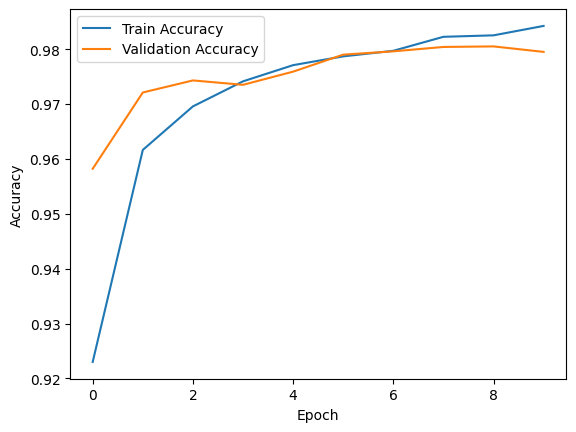

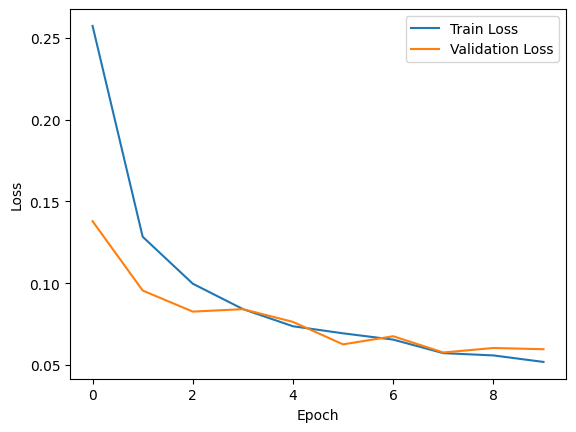

In [14]:
# Plot akurasi pelatihan dan validasi per epoch
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot kehilangan (loss) pelatihan dan validasi per epoch
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()